# Detector Gain

You could calculate the mean of each flat image manually using IRAF. Alternatively, you could calculate the means for all of the images automatically using Python.

In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
# glob serves some of the same functions as ls in the terminal
import glob

## FITS Headers
The headers of the FITS files contain the exposure times of the flat images. Now we use `fits.open` instead of `fits.getdata`. HDU stands for Header/Data Unit.

In [2]:
hdu = fits.open('data/Flat.15S0X1.V.14.fits')
header = hdu[0].header
print(header['exptime'])

15.0


## Calculating Mean Counts
We can find all of the flat images, assuming they all have 'Flat' in the name.
#### You will need to change the path to the directory containing your data.

In [3]:
# This is equivalent to $ ls Flat*.fits
flat_list = glob.glob('data/Flat*.fits')
print(flat_list)

['data/Flat.0S0X1.V.19.fits', 'data/Flat.10S0X1.V.15.fits', 'data/Flat.15S0X1.V.14.fits', 'data/Flat.1S0X1.V.18.fits', 'data/Flat.20S0X1.V.13.fits', 'data/Flat.25S0X1.V.12.fits', 'data/Flat.2S0X1.V.17.fits', 'data/Flat.30S0X1.V.11.fits', 'data/Flat.40S0X1.V.10.fits', 'data/Flat.50S0X1.V.09.fits', 'data/Flat.5S0X1.V.16.fits', 'data/Flat.60S0X1.V.08.fits', 'data/Flat.70S0X1.V.07.fits', 'data/Flat.80S0X1.V.06.fits']


Now we can loop through each flat image, and keep track of the exposure time and mean counts

In [4]:
# These are empty lists (arrays) to store the exposure times and mean counts
exp_times = []
means = []

for filename in flat_list:
    # Open the FITS file
    hdu = fits.open(filename)
    
    exptime = hdu[0].header['exptime']
    print('Exposure time {} sec'.format(exptime))
    
    # This will append the exposure time for each image to the array
    exp_times.append(exptime)
    
    # Same for mean counts
    mean_counts = np.mean(hdu[0].data)
    print('Mean counts: {:.2f}\n'.format(mean_counts))
    means.append(mean_counts)

# Convert to Numpy arrays so they can be sorted
exp_times = np.array(exp_times)
means = np.array(means)

# Sort by exposure time so the plot looks correct
time_sort = np.argsort(exp_times)
exp_times = exp_times[time_sort]
means = means[time_sort]

Exposure time 0.5 sec
Mean counts: 1932.36

Exposure time 10.0 sec
Mean counts: 19040.18

Exposure time 15.0 sec
Mean counts: 28051.22

Exposure time 1.0 sec
Mean counts: 2843.24

Exposure time 20.0 sec
Mean counts: 36939.74

Exposure time 25.0 sec
Mean counts: 45578.52

Exposure time 2.0 sec
Mean counts: 4655.94

Exposure time 30.0 sec
Mean counts: 52558.64

Exposure time 40.0 sec
Mean counts: 57670.04

Exposure time 50.0 sec
Mean counts: 57950.41

Exposure time 5.0 sec
Mean counts: 10098.66

Exposure time 60.0 sec
Mean counts: 57976.67

Exposure time 70.0 sec
Mean counts: 58006.20

Exposure time 80.0 sec
Mean counts: 58029.92



## Plot mean counts versus exposure time


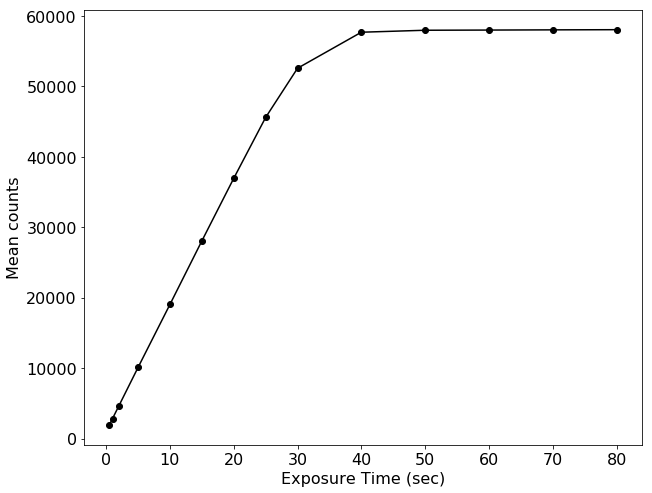

In [5]:
plt.figure(figsize=(10, 8))
plt.rcParams['font.size'] = 16

plt.plot(exp_times, means, '-ko')
plt.xlabel('Exposure Time (sec)')
plt.ylabel('Mean counts')
plt.show()